# 1. Введение

Добро пожаловать в раздел, посвящённый моделям машинного обучения в production ⭐

Модели машинного обучения сами по себе никому не нужны — они создаются для того, чтобы приносить пользу. В этом и последующих модулях мы разберём, как заставить ML-модель работать на бизнес.

АВТОРЫ МОДУЛЯ

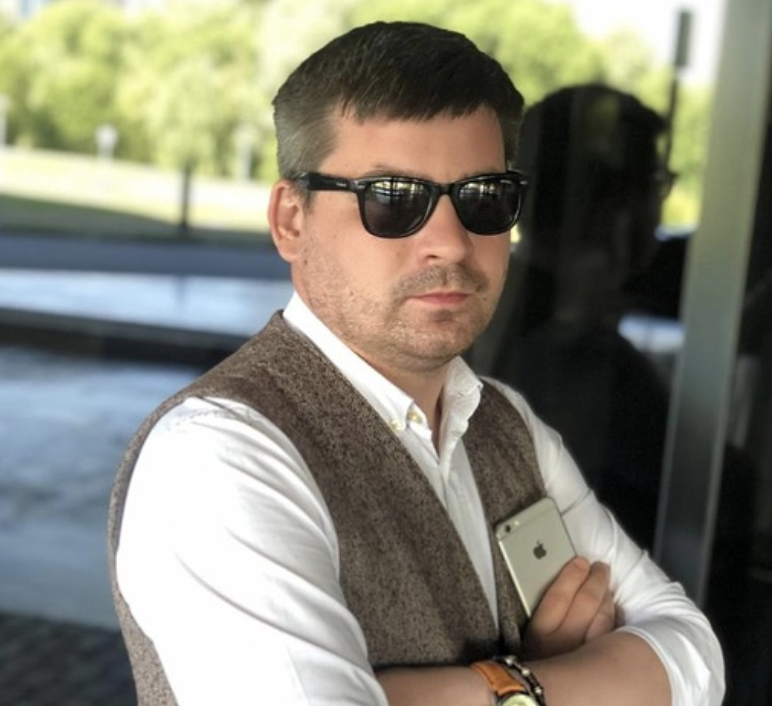

КИРИЛЛ ВЛАСОВ
* Преподаёт машинное обучение и методы работы с большими данными в МФТИ.
* Разрабатывает и внедряет решения на основе промышленного искусственного интеллекта в компании «Цифра».
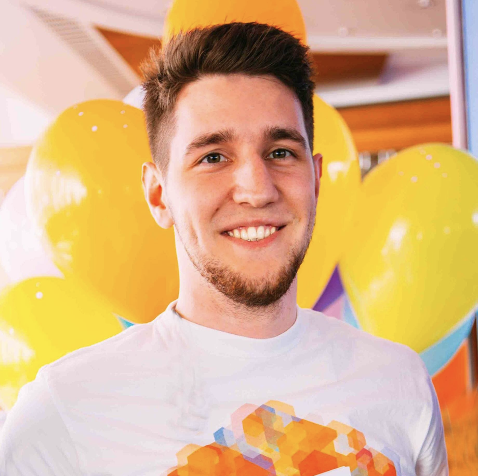

МИХАИЛ СВЕШНИКОВ
* Преподаёт на факультете компьютерных наук ВШЭ.
* Разрабатывает фреймворк для деплоя ML-моделей в компании «Цифра».


В ЭТОМ РАЗДЕЛЕ ВЫ:

Узнаете:

* о различных способах применения ML-моделей;

* таких понятиях, как изолированность, оркестрация и контейнеризация;

* больше о жизненном цикле ML-моделей и о том, как происходит их разработка в DS-командах на стадии выведения модели в production;

* как учесть требование воспроизводимости среды в DS-проекте;

* особенности монолитной и микросервисной архитектур, организации взаимодействия между сервисами;

Научитесь:

* формулировать требования продакшн-среды к ML-моделям;

* сохранять ML-модели в зависимости от этих требований;

* разрабатывать простейшие веб-сервисы для деплоя моделей на Flask;

* создавать контейнеры для своих моделей и работать с Docker и Docker-compose;

* оценивать качество моделей после внедрения в production.

### МОДЕЛИ В ВАКУУМЕ НИКОМУ НЕ НУЖНЫ


Вы уже умеете создавать модели машинного обучения: они выдают какие-то предсказания, и вы научились оценивать их с помощью метрик качества. Вы можете составлять графики и делать выводы на основе данных. Но что дальше?

Важно задать себе следующие вопросы:

* Какими будут основные потребители результатов? Это будут другие сервисы? Или модель будет встроена в мобильное приложение?
* Как и в каком виде потребители ожидают получать результаты? По времени или по запросу? Если по запросу, то по каким правилам они будут его осуществлять?
* Какая для этого существует (или планируется) инфраструктура?

### ВСПОМИНАЕМ CRISP-DM

Существует множество методологий для управления Data Science-проектами. Наиболее распространённой методологией разработки является знакомая нам модель Cross-Industry Standard Process for Data Mining, или CRISP-DM. Давайте ещё раз взглянем на её этапы:

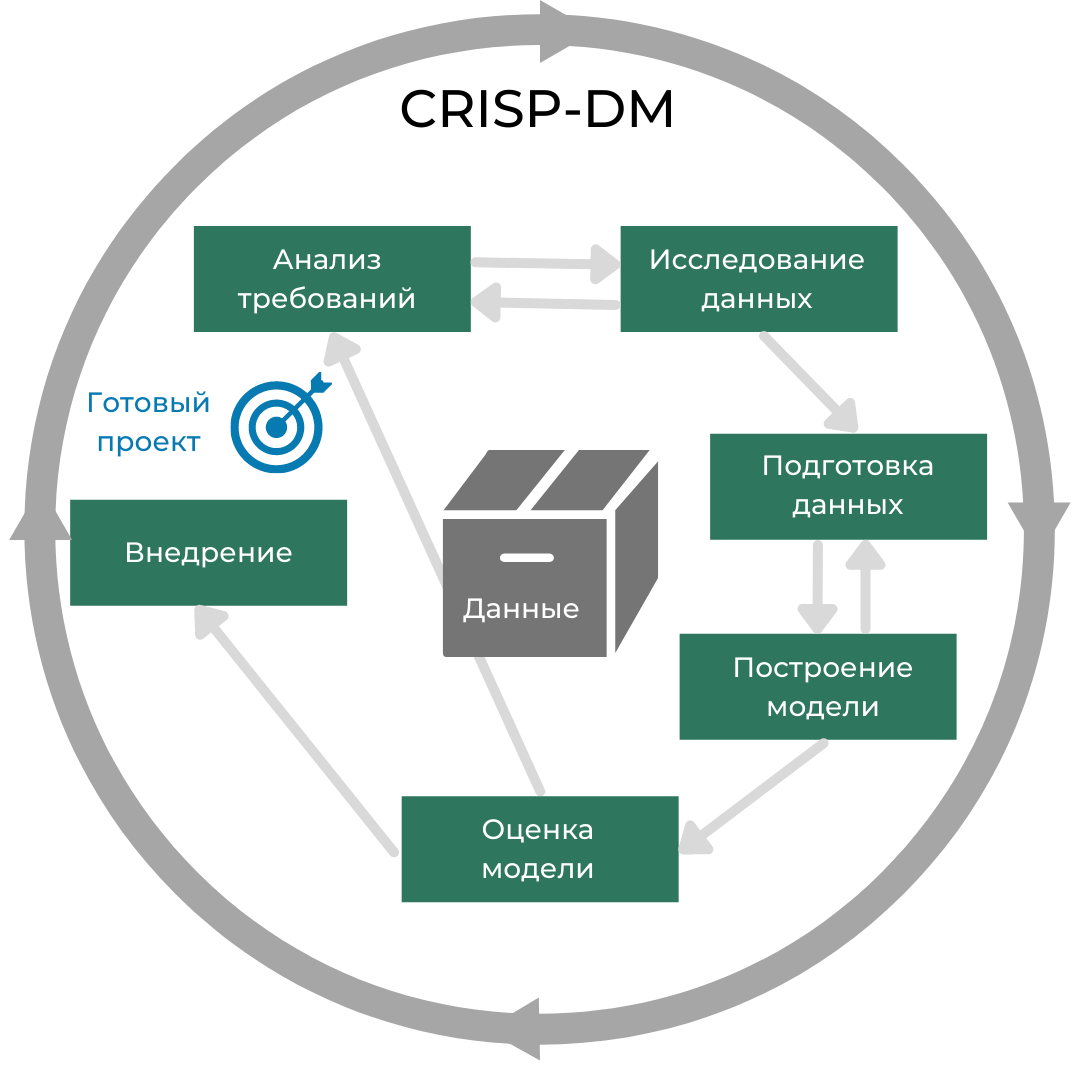

Примечание. Если вы забыли, что из себя представляет методология разработки CRISP-DM, рекомендуем заглянуть в модуль ML-1. «Теория машинного обучения».(https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/7b1ebdb25d9741fa94fb85242fe11476)

На этапе внедрения мы должны понять, будет ли происходить деградация модели во времени в связи с изменением распределений входных данных и возможно ли автоматизировать оценку качества, обновление моделей и их деплой.

Как учесть все эти сложности в процессе разработки моделей? Вот с этим мы и будем разбираться.

### ДЕПЛОЙ МОДЕЛИ

Задача развёртывания приложения на сервере называется деплой (от англ. deployment — внедрение, развёртывание). По сути, это процесс трансформации исходного кода вашего приложения в рабочее состояние на конкретном сервере.

Для того чтобы внедрить модель в продакшн (в минимальном варианте), необходимо:

1. Сохранить обученную модель в файл.
2. Поднять сервер.
3. Доставить и запустить на нём свою модель.
Звучит довольно просто, не так ли?

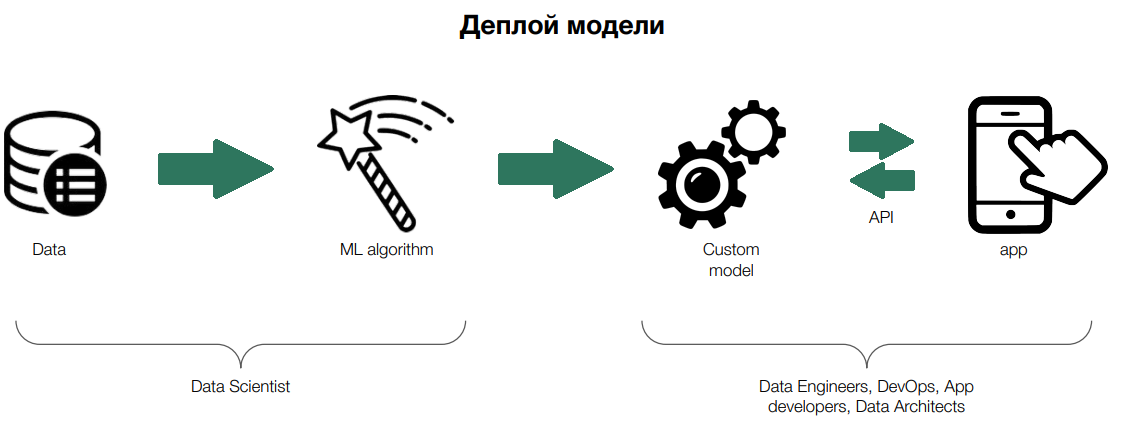

К сожалению, при моделировании зачастую не учитываются вопросы, связанные с деплоем модели и её внедрением в уже существующие системы. Для чего мы обучили модель? Может быть, мы будем использовать её для чат-бота? Может, она должна быть встроена в приложение для iPhone? Как часто потребуется переобучать модель?

Опыт подсказывает, что если модель создаётся «в вакууме», то в итоге её просто нельзя будет вывести в продакшн.

Дополнительной проблемой является то, что большинство библиотек для машинного обучения сфокусированы именно на обучении, а не на предсказании.

Кроме того, в крупных компаниях дата-сайентисты, дата-инженеры, ML-инженеры, занимающиеся внедрением моделей в продакшн, могут быть не просто разными людьми, но и разными командами. На практике может оказаться так, что готовая обученная модель будет внедрена другой командой на другом языке программирования. При этом обычным разработчикам модели машинного обучения могут представляться непрозрачными загадочными чёрными ящиками.

В этом модуле мы будем учиться подготавливать модели к внедрению в продакшн и разворачивать собственный веб-сервис. Как вы увидите дальше, код, который мы написали в Jupyter Notebook, практически никогда не попадает в продакшн без изменений.

#### Цели этого модуля:

* Понять, что такое инференс модели и как организуется сохранение и загрузка модели.
* Узнать, что такое сериализация и десериализация и научиться их различать.
* Понять, что делать, если итоговый проект реализован на другом языке программирования, а ваша модель обучена на Python.
* Рассмотреть вопросы сетевого взаимодействия и узнать о настройке взаимодействия между серверами по сети.
* Закрепить умение писать запросы к серверу (мы затрагивали эту тему в модуле PY-17. «Как получать данные из веб-источников и API»(https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/d709c5b90c7847c8b277ace34560cc23), но теперь веб-источник мы будем создавать сами).
* Разобрать основные отличия и области применения фреймворков для разработки веб-сервисов (Django, FastAPI и, конечно, Flask).
* Научиться использовать фреймворк Flask для реализации простейших сервисов моделей.
* Познакомиться с инструментами uWSGI и NGINX, которые помогают повысить пропускную способность и производительность сервера.

# 2. Сохранение и загрузка моделей: pickle и joblib

Представьте ситуацию: вы садитесь за руль автомобиля, и… вам нужно заново учиться водить! Сложная ситуация, не правда ли? В реальности мы просто заводим машину, включаем передачу и начинаем движение.

Примерно того же продакшн-среда требует от моделей. И это понятно, ведь намного дешевле с точки зрения расходования ресурсов хранить данные в виде готовой модели, чем каждый раз заново обучать модель на сервере из восьми видеокарт.

Именно поэтому код, который был написан для обучения модели и оценки её качества, крайне редко используется для инференса (от англ inference — вывод). Так называется непрерывная работа алгоритма машинного обучения в конечном приложении. По этой причине при внедрении моделей в продакшн их принято сохранять в готовом виде, то есть уже обученными и готовыми решать реальные задачи.

![img](https://lms-cdn.skillfactory.ru/assets/courseware/v1/2bfccc86be86ea8c3ee872a7c546a27f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DSPROD_md1_2_1.png)

Изучив материалы в этом юните, вы сможете:

1. Подробно разобраться с тем, как с помощью библиотеки pickle сохранять обученные модели машинного обучения, загружать их обратно и заново обращаться к ним для предсказаний.
2. Узнать о способах передачи моделей для внедрения на языках программирования, отличных от Python.
3. Разобраться с темой сериализации.

Совет. Обязательно попробуйте воспроизвести примеры, которые мы будем разбирать далее.

### СЕРИАЛИЗАЦИЯ И ДЕСЕРИАЛИЗАЦИЯ

Как и почти всё в языке программирования Python, обученная модель является объектом. Этот объект не простой, поскольку модель содержит сложную иерархию классов — в каждом классе есть набор полей, ссылающихся на объекты других классов, и так далее.

Например, объект класса RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html из библиотеки sklearn содержит множество полей, часть из которых устанавливается во время инициализации модели (максимальная глубина, количество деревьев в ансамбле, критерий информативности и т. д.), а часть определяется во время обучения модели (последовательность предикатов внутри каждого дерева в ансамбле, значимость признаков). Наша задача — «законсервировать» этот объект (модель), сохранив значение всех полей, которые мы задали при инициализации объекта и получили по итогам обучения. То есть мы должны сохранить модель, включая её внешние и внутренние параметры.

Чтобы гарантировать сохранение всей структуры данных и получить её при загрузке обратно, используется сериализация.

Сериализация — это процесс трансформации любой структуры данных, поддерживаемой в языке, в последовательность битов (или байтов). Обратной операцией является десериализации.

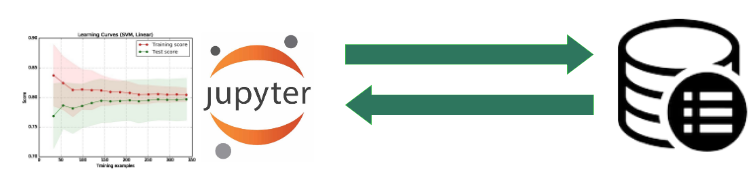

# Зачем это нужно?

То, в каком виде данные записаны на диск, зачастую может сильно отличаться от того, в каком виде они существуют в памяти программы. И там, и там это будут байты информации, но в файле будет представлена просто их последовательность, а в памяти программы это может быть какой-то объект или даже несколько объектов со структурой.

Приведём простой пример с форматом CSV. Пусть у нас есть файл с одной строкой, где несколько слов записаны через запятую. На диске это будет записано просто как последовательность байтов.

Однако когда мы считываем эту последовательность внутри программы, мы хотим работать с ней как со списком строк, то есть нам нужно не только считать эти данные, но и применить к ним некоторое преобразование:

In [45]:
line='word1,word2,word3'
line.split(',')

['word1', 'word2', 'word3']

Можно заметить, что после этого преобразования появилось много объектов (каждое слово списка) и некоторая структура (то, как слова расположены в этом списке). Процесс, который мы только что выполнили, называется десериализацией.

Также возможен обратный процесс, когда мы хотим сохранить в виде последовательности байтов какие-то данные из памяти программы. Например, нам нужно снова получить начальную строку:

In [46]:
",".join(['word1','word2','word3'])

'word1,word2,word3'

Этот процесс как раз и называется сериализацией.

Мы разобрали простейший пример, но на практике всё гораздо сложнее. Сериализовывать можно не только в текст (как с CSV, JSON и подобными форматами), но и в бинарный формат, который человек не сможет прочитать.

Бывают форматы, которые могут описывать более сложные структуры (тот же JSON). Также можно добавить сжатие итогового набора битов.

Заметим, что программа должна потратить некоторый ресурс CPU, чтобы преобразовать объект в набор байтов и наоборот.

Задание 2.1

Для чего нужна сериализация?
- [ ] Позволяет упаковать структуры данных и функций в единый компонент.
- [ ] Обеспечивает способность функции обрабатывать структуры данных разных типов.
- [ ] Выделяет главные характеристики структуры данных и отбрасывает второстепенные.
- [x] Позволяет трансформировать структуры данных в последовательность байтов.

Задание 2.2

Гарантируется ли, что после процесса сериализации и десериализации вы получите те же самые структуры данных?
- [X] Да, гарантируется.
- [ ] Нет, при десериализации всегда получаются структуры данных, отличные от исходных.

### ИНСТРУМЕНТЫ СЕРИАЛИЗАЦИИ: PICKLE

Посмотрим, с помощью каких средств происходит сериализация объектов в Python.

В стандартную библиотеку Python входит модуль pickle, который служит для сериализации почти всех объектов произвольного типа.

Мы помним, что объекты находятся в оперативной памяти и направляются в байтовые потоки ввода-вывода. В байтовые потоки может быть направлен любой файлоподобный объект.

В ходе десериализации исходный объект воссоздаётся в оперативной памяти с теми же самыми значениями, но с новой идентичностью — новым адресом в памяти.



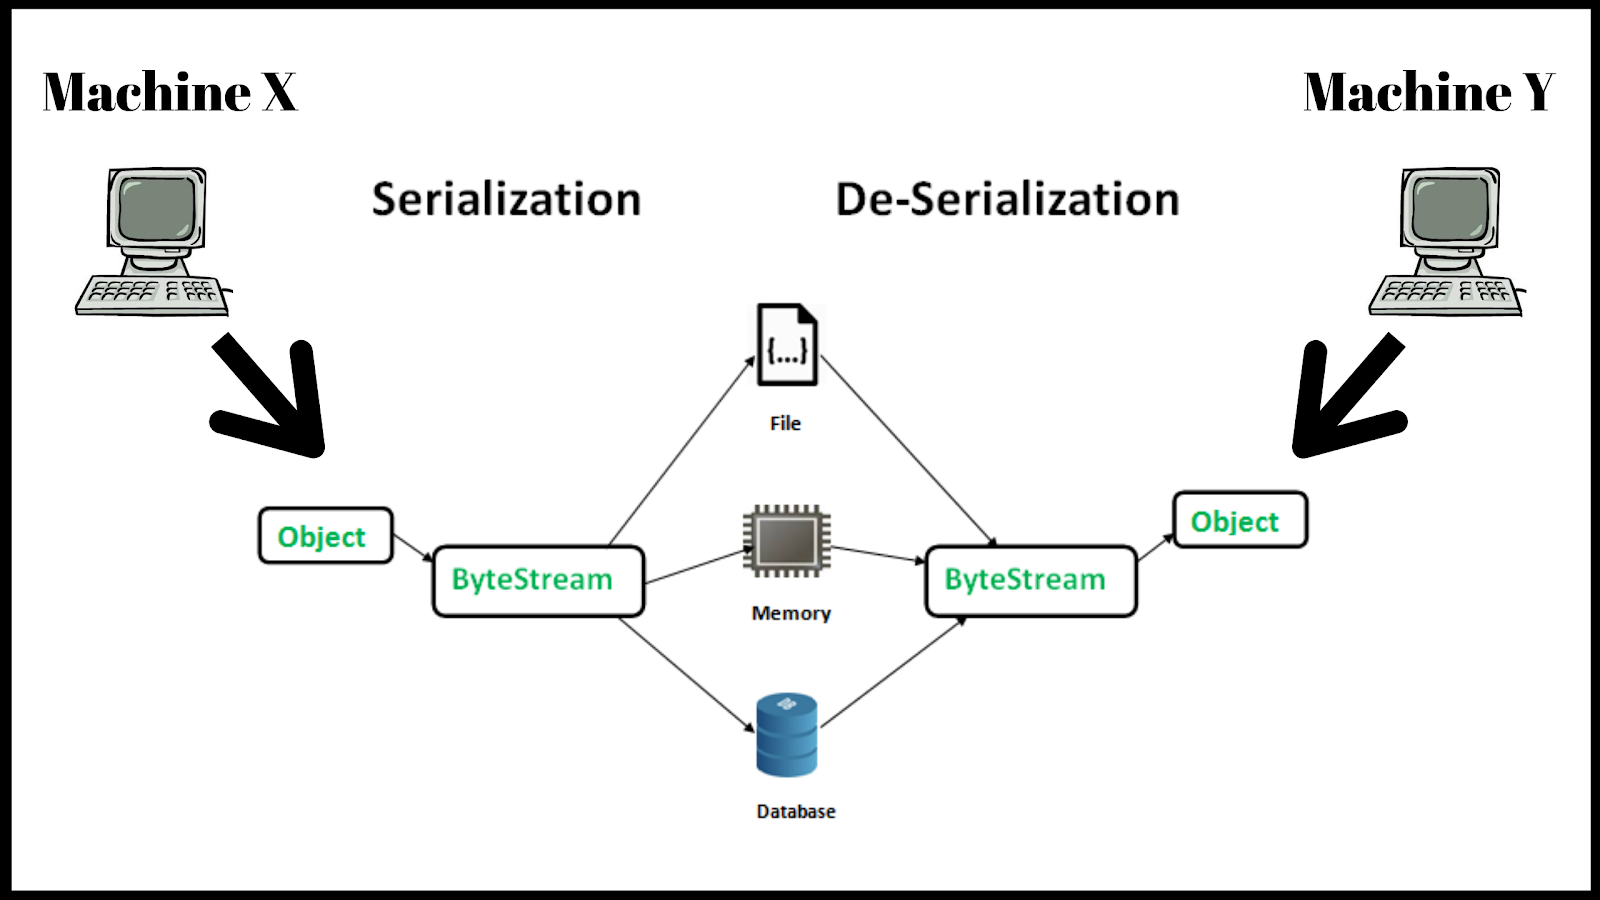

Обратите внимание на предупреждение в официальной документации:

⛔ Warning. The pickle module is not secure. Only unpickle data you trust.

Так как законсервирован может быть абсолютно любой объект, в нём могут быть «спрятаны» различные вредоносные программы или данные. Поэтому будьте внимательны и не проводите десериализацию бинарных файлов, в происхождении которых вы не уверены.

Не переживайте: файлы, предлагаемые для десериализации в рамках нашего курса, безопасны.

Для иллюстрации работы модуля pickle последовательно пройдёмся по всем шагам и разберёмся с тем, как сериализовать уже обученные алгоритмы машинного обучения.

ШАГ №1

Обучим модель линейной регрессии на встроенном датасете о диабете — Diabetes dataset.

В данном датасете представлены десять исходных признаков: возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови были получены для каждого из 442 пациентов с сахарным диабетом. Интерес представляет количественный показатель прогресса заболевания, замеренный через год после исходного измерения. Тип задачи — регрессия.

Примечание. Для простоты и наглядности мы опустим процесс предобработки данных, разведывательный анализ, разделение выборки на обучающую и тестовую, валидацию модели и подбор гиперпараметров, так как для наших целей это неважно. Мы уверены, что вы уже способны произвести эти этапы самостоятельно.

В качестве модели, прогнозирующей целевую переменную, возьмём простейшую линейную регрессию, и обучим её на исходных данных:

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X,y=load_diabetes(return_X_y=True)# Загружаем датасет о диабете
regressor=LinearRegression()# Инициализируем модель линейной регрессии
regressor.fit(X,y)# Обучаем модель

LinearRegression()

В результате выполнения кода получился объект класса LinearRegression, на который ссылается переменная regressor. При этом атрибуты объекта (веса модели линейной регрессии) были сформированы во время обучения. То есть объект regressor теперь является обученной моделью.

ШАГ №2

Далее, когда мы получили обученную модель, нам необходимо сериализовать её, превратив объект Python в поток байтов. Для этого импортируем модуль pickle и воспользуемся функцией dumps(), в которую нужно передать объект Python.

In [48]:
import pickle
model=pickle.dumps(regressor)# Производим сериализацию обученной модели
print(type(model))
print(type(regressor))

<class 'bytes'>
<class 'sklearn.linear_model._base.LinearRegression'>


Как видим, мы создали объект model типа bytes.

ШАГ №3

Давайте попробуем восстановить (десериализовать) объект Python. Для этого в модуле pickle есть функция loads(), в которую нужно передать сериализованный объект (поток байтов).

In [49]:
regressor_from_bytes=pickle.loads(model)
regressor_from_bytes

LinearRegression()

В результате десериализации мы смогли восстановить исходный объект (модель).

ШАГ №4

Сохраним сериализованный объект прямо в файл. Для этого в pickle есть функция dump() (без s на конце). В неё необходимо передать имя файла или ссылку на открытый файл. Файл назовём myfile, его расширение — .pkl (формат данных pickle):

In [50]:
with open('myfile.pkl','wb') as output: # Производим сериализацию и записываем результат в файл формата pkl
    pickle.dump(regressor,output)

Теперь у нас есть бинарный файл с готовой моделью, и мы можем передать его, например, ML-инженерам, которые будут заниматься деплоем модели на сервер.

ШАГ №5

Посмотрим на код, который восстанавливает (десериализует) обученную модель из файла myfile.pkl. Для этого в pickle есть функция load() (без s на конце). В неё необходимо передать имя файла или ссылку на открытый файл.

In [51]:
with open ('myfile.pkl','rb') as pkl_file: # Производим десериализацию и извлекаем модель из файла формата pkl
    regressor_from_file=pickle.load(pkl_file)

regressor_from_file

LinearRegression()

ШАГ №6

Убедимся, что методы и результаты предсказаний обученной модели и модели, загруженной из файла, совпадают:

In [52]:
print(all(regressor.predict(X)==regressor_from_bytes.predict(X)))
print(all(regressor.predict(X)==regressor_from_file.predict(X)))


True
True


Как видите, исходная и восстановленная из байтов и файла модели дают одинаковые предсказания. Это значит, что теперь мы можем импортировать наши обученные модели в любое Python-приложение и пользоваться ими, минуя этап обучения и все этапы, предшествующие ему.

ОГРАНИЧЕНИЯ

Как мы упоминали, у pickle есть ограничения. Например, мы не можем сериализовать лямбда-функции. Давайте посмотрим, что нам вернёт следующий код:

In [53]:
#my_lambda=lambda x:x*2
#with open ('my_lambda.pkl','wb') as output:
    #pickle.dump(my_lambda,output)

['word1', 'word2', 'word3']


'word1,word2,word3'
























  LinearRegression?i
LinearRegression()



<class 'bytes'>
<class 'sklearn.linear_model._base.LinearRegression'>




  LinearRegression?i
LinearRegression()







  LinearRegression?i
LinearRegression()


True
True



---------------------------------------------------------------------------
PicklingError                             Traceback (most recent call last)
Cell In[18], line 3
      1 my_lambda=lambda x:x*2
      2 with open ('my_lambda.pkl','wb') as output:
----> 3     pickle.dump(my_lambda,output)

PicklingError: Can't pickle <function <lambda> at 0x0000021E00FDA480>: attribute lookup <lambda> on __main__ failed

Совет. В таких случаях лучше пользоваться пакетом dill (https://github.com/uqfoundation/dill)

Задание 2.3

Что делает функция dumps() из библиотеки pickle?
- [ ] Позволяет сохранить сериализованный объект в файл.
- [x] Возвращает сериализованный объект.
- [ ] Загружает объект из файла и десериализует его.
- [ ] Загружает объект из потока байтов.

Задание 2.4

Что делает функция load() из библиотеки pickle?

- [ ] Позволяет сохранить сериализованный объект в файл.
- [ ] Возвращает сериализованный объект.
- [x] Загружает объект из файла и десериализует его.
- [ ] Загружает объект из потока байтов.

### СОХРАНЕНИЕ ПАЙПЛАЙНА

Ранее мы посмотрели простейший пример сериализации готовой модели.

У вас мог возникнуть вопрос: что делать, если перед подачей данных в модель их необходимо предобработать, например произвести стандартизацию, исключить неинформативные признаки? Неужели придётся прописывать все эти шаги в коде инференса модели? А что если вопросами инференса занимаются совершенно другие специалисты, которые вообще ничего не знают о машинном обучении и не умеют производить предобработку данных?

Конечно, мы должны передать результаты в таком виде, чтобы ими можно было воспользоваться без лишних манипуляций.

Мы уже упоминали, что pickle работает с любыми объектами Python. Поэтому для сохранения может быть доступна не просто обученная модель, но и целый пайплайн, включающий предобработку данных.

Примечание. Если вы забыли, что такое пайплайны и как их формировать с помощью библиотеки sklearn, рекомендуем заглянуть в модуль ML-8. «Продвинутые методы машинного обучения».(https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/199ce0b58cb740bab7fae7db97b7f216)

Например, мы хотим сериализовать пайплайн, который включает в себя min-max-нормализацию и отбор пяти наиболее важных факторов на основе корреляции Пирсона. Полученные в результате данные отправляются на вход модели линейной регрессии.

In [54]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
X,y=load_diabetes(return_X_y=True) # Загружаем датасет о диабете
# Создаём пайплайн, который включает нормализацию, отбор признаков и обучение модели
pipe=Pipeline([
    ('Scaling',MinMaxScaler()),
    ('FeatureSelection',SelectKBest(f_regression,k=5)),
    ('Linear',LinearRegression())
])
pipe.fit(X,y) # Обучаем пайплайн

Pipeline(steps=[('Scaling', MinMaxScaler()),
                ('FeatureSelection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000021E05F04B80>)),
                ('Linear', LinearRegression())])

Пайплайн обучен. Давайте сохраним его в файл с помощью pickle:

In [56]:
# Сериализуем pipeline и записываем результат в файл
with open ('my_pipeline.pkl','wb') as output:
    pickle.dump(pipe, output)

Если сериализация завершилась успешно, то при инференсе модели мы сможем восстановить её из файла:

In [57]:
with open ('my_pipeline.pkl','rb') as pkl_file:
    loaded_pipe=pickle.load(pkl_file)

Проверим, что результаты исходного и десериализованного пайплайнов и идентичны:

In [58]:
print(all(pipe.predict(X)==loaded_pipe.predict(X)))

True


Примечание. Если мы хотим сохранять сериализованные пайплайны в виде потока байтов, нужно использовать функции dumps() и loads(), а не dump() и load().

Однако в процессе предобработки могут возникнуть шаги, которые нельзя реализовать стандартными методами sklearn. Например, для решения многих задач в нашем курсе мы часто использовали feature engineering, чтобы повысить качество работы моделей. Как встроить этот шаг в исходный пайплайн?

Для этого в sklearn можно организовать так называемые кастомные трансформеры. Такой трансформер должен наследоваться от двух классов: TransformerMixin и BaseEstimator.

Посмотрим на шаблон кастомного трансформера:

In [59]:
from sklearn.base import TransformerMixin, BaseEstimator
class MyTransformer(TransformerMixin, BaseEstimator):
    '''Шаблон кастомного трансформера'''
 
    def __init__(self):
        '''
        Здесь прописывается инициализация параметров, не зависящих от данных.
        '''
        pass
 
    def fit(self, X, y=None):
        '''
        Здесь прописывается «обучение» трансформера.
        Вычисляются необходимые для работы трансформера параметры (если они нужны).
        '''

        return self
 
    def transform(self, X):
        '''
        Здесь прописываются действия с данными.
        '''
        return X

У трансформера должно быть три обязательных метода:

* __init__() — метод, который вызывается при создании объекта данного класса. Он предназначен для инициализации исходных параметров.
Например, у трансформера для создания полиномиальных признаков PolynomialFeatures из sklearn в методе
__init__() параметр degree задаёт степень полинома.
* fit() — метод, который вызывается для «обучения» трансформера. Он должен возвращать ссылку на сам объект (self).
Например, в трансформере StandardScaler в методе fit() прописано вычисление среднего значения и стандартного отклонения в каждом столбце таблицы, переданной в качестве параметра метода fit().
* transform() — метод, который трансформирует приходящие на вход данные. Он должен возвращать преобразованный массив данных.
Например, при вызове метода transform() у StandardScaler из sklearn внутри происходит преобразование — вычитание из каждого столбца среднего и деление результата на стандартное отклонение. Причём среднее и стандартное отклонение вычисляются заранее в методе fit().

Примечание. Как мы знаем, у некоторых трансформеров из sklearn, например у того же MinMaxScaler, есть ещё и метод fit_transform(), который является комбинацией методов fit() и transform().

Наш трансформер пока что ничего не делает. Предположим, мы хотим генерировать в данных новый признак, который является простым произведением первых трёх столбцов таблицы. Давайте пропишем в методе transform() эти действия.

Для работы такого трансформера нужны только исходные данные без дополнительных параметров, поэтому методы __init__() и fit() остаются без изменений.

In [60]:
class MyTransformer(TransformerMixin, BaseEstimator):
    '''Шаблон кастомного трансформера'''


    def __init__(self):
        '''Здесь прописывается инициализация параметров, не зависящих от данных.'''
        pass


    def fit(self, X, y=None):
        '''
        Здесь прописывается «обучение» трансформера.
        Вычисляются необходимые для работы трансформера параметры (если они нужны).
        '''
        return self


    def transform(self, X):
        '''Здесь прописываются действия с данными.'''
        # Создаём новый столбец как произведение первых трёх
        new_column = X[:, 0] * X[:, 1] * X[:, 2]
        # Для добавления столбца в массив нужно изменить его размер на (n_rows, 1)
        new_column = new_column.reshape(X.shape[0], 1)
        # Добавляем столбец в матрицу измерений
        X = np.append(X, new_column, axis=1)
        return X

Посмотрим, как работает наш кастомный трансформер. Создадим объект трансформера, вызовем метод transform и посмотрим на результирующий размер таблицы.

In [64]:
import numpy as np

In [65]:
custom_transformer=MyTransformer() # Инициализируем объект класса MyTransformer (вызывается метод __init__)
custom_transformer.fit(X) # Чисто формально вызываем метод fit, но у нас он ничего не делает
X_transformed=custom_transformer.transform(X)# Трансформируем исходные данные (вызывается метод transform)
print('Shape before transform:{}'.format(X.shape))
print('Shape after transform:{}'.format(X_transformed.shape))

Shape before transform:(442, 10)
Shape after transform:(442, 11)


Видно, что в результате трансформации в исходную матрицу наблюдений добавился новый столбец.

Теперь давайте встроим этот трансформер в сам пайплайн — для этого достаточно добавить новый шаг в пайплайн.

In [67]:
pipe=Pipeline([
    ("FeatureEngineering", MyTransformer()),
    ("Scaling", MinMaxScaler()),
    ('FeatureSelection',SelectKBest(f_regression,k=5)),
    ('Linear', LinearRegression())
])
pipe.fit(X,y)

Pipeline(steps=[('FeatureEngineering', MyTransformer()),
                ('Scaling', MinMaxScaler()),
                ('FeatureSelection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000021E05F04B80>)),
                ('Linear', LinearRegression())])

Наконец можно сериализовать полученный pipeline:

In [68]:
with open ('my_new_pipeline.pkl','wb') as output:
    pickle.dump(pipe, output)

Теперь мы можем передать пайплайн и воспользоваться им для инференса, предварительно произведя десериализацию.

Задание 2.5

Десериализуйте полученный pipeline с добавленным в него кастомной трансформации из файла. Затем предскажите значение целевой переменной для наблюдения, которое описывается следующим вектором:

In [69]:
features = np.array([[ 0.00538306, -0.04464164,  0.05954058, -0.05616605,  0.02457414, 0.05286081, -0.04340085,  0.05091436, -0.00421986, -0.03007245]])

В поле для ответа введите предсказанное значение целевой переменной, округлённое до целого числа.

In [76]:
# Десериализуем pipeline из файла
with open('my_new_pipeline.pkl', 'rb') as pkl_file:
    loaded_pipe_2_5 = pickle.load(pkl_file)
features = np.array([[ 0.00538306, -0.04464164,  0.05954058, 
                      -0.05616605,  0.02457414, 0.05286081, -0.04340085,  
                      0.05091436, -0.00421986, -0.03007245]])
round(int(loaded_pipe_2_5.predict(features)))
#np.round(loaded_pipe.predict(features))

C:\Users\molde\AppData\Local\Temp\ipykernel_29672\3127638102.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(int(loaded_pipe_2_5.predict(features)))


173

In [77]:
loaded_pipe_2_5

Pipeline(steps=[('FeatureEngineering', MyTransformer()),
                ('Scaling', MinMaxScaler()),
                ('FeatureSelection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000021E05F04B80>)),
                ('Linear', LinearRegression())])

В дополнение предлагаем вам ознакомиться с примерами использования пайплайнов (на англ. языке):

* Sklearn Pipeline Tutorial;(https://www.kaggle.com/sermakarevich/sklearn-pipelines-tutorial)
* Pipeline Guide (GitHub);(https://gist.github.com/amberjrivera/8c5c145516f5a2e894681e16a8095b5c)
* A Simple Guide to Scikit-learn Pipelines.(https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

БИБЛИОТЕКА JOBLIB

Как мы видим, pickle прекрасно справляется со своей задачей: мы можем сериализовать и восстанавливать любые Python-объекты, включая модели и даже пайплайны. Однако иногда массивы данных, на которых обучаются модели, бывают настолько большими, что после загрузки из pickle невозможно восстановить объект полностью.

В таких случаях вместо pickle лучше использовать библиотеку joblib. Этот модуль более эффективен и надёжен для работы с объектами, которые содержат большие массивы данных. Пожалуй, единственный минус этого модуля в том, что он может «консервировать» только в файл, поэтому вы не сможете получить объект в виде бинарной строки и работать с ним. В модуле попросту отсутствуют методы для работы с бинарной строкой. Формат файлов для сохранения — .joblib.

В остальном работа с joblib полностью идентична работе с pickle: после обучения модели производим сериализацию с помощью функции dump(), а в коде самого приложения, где нужно использовать модель, выполняем десериализацию с помощью функции load(). В каждую из этих функций необходимо передать путь до файла для записи и чтения соответственно.

Для иллюстрации работы сохраним полученную линейную регрессию:

In [79]:
import joblib
X,y=load_diabetes(return_X_y=True) # Загружаем датасет о диабете
regressor=LinearRegression() # Обучаем модель линейной регрессии
regressor.fit(X,y)
joblib.dump(regressor,'regr.joblib')# Производим сериализацию и сохраняем результат в файл формата .joblib


['regr.joblib']

Загрузим файл заново (загрузка может быть произведена в другом файле с кодом):

In [81]:
clf_from_jobliv=joblib.load('regr.joblib') # Десериализуем модель из файла
all(regressor.predict(X)==clf_from_jobliv.predict(X)) # Сравниваем предсказания

True

Задание 2.6


Представьте ситуацию: мы обучили модель машинного обучения, реализующую предсказание длительности поездки в такси. Результирующий пайплайн, включающий в себя все шаги вплоть до модели, мы сериализовали и записали в файл 'model.joblib'.

Теперь мы хотим интегрировать эту модель в приложение по заказу такси (приложение реализовано на Python). Для этого нам необходимо произвести десериализацию.

Какой из указанных ниже вариантов кода позволит нам это сделать, если мы расположили файл с сериализованной моделью в директории models относительно той директории, в которой расположен исходный код приложения?

- [ ] joblib.load('model.joblib')
- [X] joblib.load('models/model.joblib')
- [ ] joblib.dump('models/model.joblib')
- [ ] joblib.loads('models/model.joblib')

# 3. Практика: pickle

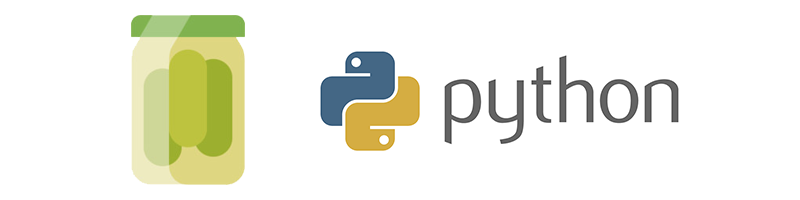

В первом практическом юните этого модуля мы будем учиться работать с модулем pickle.

Ваш коллега Василий обучил модель и теперь просит вас проверить её на ваших данных. Он присылает вам pickle-файл. Загрузите модель(https://lms-cdn.skillfactory.ru/assets/courseware/v1/edb336d23fdbf18a919f9dbfad55426a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/model.pkl), используя модуль pickle.

Задание 3.1

При загрузке вывелся секретный код. Введите его в поле ниже.

In [85]:
with open ('model.pkl','rb') as pkl_file:
    loaded_pipe_3=pickle.load(pkl_file)

secret word: skillfactory
how is this possible? answer is here: https://youtu.be/xm-A-h9QkXg


C:\Users\molde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Задание 3.2

Проверьте, объект какого типа получился. Какую модель вам прислал коллега?
- [X] LinearRegression
- [ ] LogisticRegression
- [ ] DecisionTreeClassifier
- [ ] DecisionTreeRegressor
- [ ] RandomForestClassifier

In [86]:
loaded_pipe_3

LinearRegression(positive=True)

Задание 3.3

Теперь необходимо применить модель. Сделайте предсказание для следующего набора фичей: [1, 1, 1, 0.661212487096872]. Введите результат, предварительно округлив его до трёх знаков после точки-разделителя.

In [93]:
with open ('model.pkl','rb') as pkl_file:
    loaded_pipe_3=pickle.load(pkl_file)
features_3 = np.array([[1, 1, 1, 0.661212487096872]])
np.round(loaded_pipe.predict(features),3)

secret word: skillfactory
how is this possible? answer is here: https://youtu.be/xm-A-h9QkXg


C:\Users\molde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([0.666])

У присланной вам модели есть два поля (атрибута) с именами a и b. Создайте из них словарь с такими же именами ключей и значениями, а затем сохраните его в файл с помощью модуля pickle.

Чтобы вы могли проверить правильность решения задания, мы создали специальный проверочный скрипт. Скачайте его здесь (https://lms-cdn.skillfactory.ru/assets/courseware/v1/9ece277164851c1c246712a4d3522fa4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/hw1_check_ol.py).

Сохраните его рядом с вашим pickle-файлом (в той же папке) и запустите, передав первым аргументом имя файла. Если вы всё сделали правильно, на экран выведется ответ для следующего задания.

Как запустить скрипт?

В ячейке Jupyter Notebook:

!python hw1_check_ol.py имя_pickle_файла.pkl
В терминале:

cd имя_папки_со_скриптом

python hw1_check_ol.py имя_pickle_файла.pkl

In [97]:
my_dict = {'a': loaded_pipe_3.a, 'b': loaded_pipe_3.b}

with open('my_dict.pkl', 'wb') as pkl_file:
    pickle.dump(my_dict, pkl_file)

!python hw1_check_ol.py my_dict.pkl


('secret code 2:', '3c508')


# 4. Сохранение и загрузка моделей: PMML и ONNX-ML

Среда или требования к инференсу модели для вашего проекта могут быть устроены так, что потребуют реализации на языке программирования, отличном от Python. Например, если компания разрабатывает десктопное приложение, то для внедрения модели её потребуется «перевести» на Java или C++. Как это сделать?

### PREDICTIVE MODEL MARKUP LANGUAGE

В таких случаях используется генерация файла формата PMML (Predictive Model Markup Language).

PMML — это XML-диалект, который применяется для описания статистических и DS-моделей. PMML-совместимые приложения позволяют легко обмениваться моделями данных между собой. Разработка и внедрение PMML осуществляется IT-консорциумом Data Mining Group.

Подробнее с PMML можно ознакомиться на официальном сайте.(http://dmg.org/pmml/v4-4/GeneralStructure.html)

К сожалению, далеко не все библиотеки для машинного обучения (в том числе sklearn) поддерживают возможность сохранения обученной модели в указанном формате. Однако для этого можно использовать сторонние библиотеки, и одной из самых популярных является Nyoka.(https://nyoka-pmml.github.io/nyoka/)

Давайте сохраним модель из предыдущего блока в формат PMML.

Для установки можно использовать систему управления пакетами pip:

!pip3 install nyoka

или

pip install nyoka

Рассмотрим пример работы с библиотекой:

In [100]:
from nyoka import skl_to_pmml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X,y =load_diabetes(return_X_y=True)
cols=load_diabetes()['feature_names']

scaler=MinMaxScaler()
pipe= Pipeline([
    ('Scaling',MinMaxScaler()),
    ('Linear',LinearRegression())
])
pipe.fit(X,y)  # Обучение пайплайна, включающего линейную модель и нормализацию признаков
skl_to_pmml(pipeline=pipe,col_names=cols,pmml_f_name='pipeline.pmml') # Сохраним пайплайн в формате pmml в файл pipeline.pmml


Итак, мы построили пайплайн обработки данных и обучили модель линейной регрессии. После этого мы с помощью функции skl_to_pmml сохранили модель в файл pipe.pmml.

Откройте файл pipe.pmml с помощью любого текстового редактора.

Давайте рассмотрим этот файл подробнее:

* Секция <DataDictionary> содержит информацию о признаках, включая наименование и тип данных, используемых для построения модели.
* Секция <TransformationDictionary> содержит информацию о необходимых преобразованиях для каждого признака. Обратите внимание, что в этом блоке также содержится информация для трансформации. Так как мы использовали minMaxScaler(), то в файле записаны минимальное и максимальное значения.

Задание 4.1

Какая секция содержит информацию о типе используемой модели?

= RegressionModel

Таким образом, в файле содержится вся информация для того, чтобы пайплайн можно было использовать на любом языке программирования.

### OPEN NEURAL NETWORK EXCHANGE

В разработке моделей на основе нейронных сетей сегодня наиболее распространён формат ONNX (Open Neural Network Exchange).

[ONNX (Open Neural Network Exchange)](https://onnx.ai/) — это открытый стандарт для обеспечения совместимости моделей машинного обучения. Он позволяет разработчикам искусственного интеллекта использовать модели с различными инфраструктурами, инструментами, средами исполнения и компиляторами.

Стандарт совместно поддерживается компаниями Microsoft, Amazon, Facebook и другими партнёрами как проект с открытым исходным кодом.

Часто стандарт ONNX и его библиотеки используют для конвертации из одного фреймворка в другой (например, из PyTorch в TensorFlow для использования в продакшене). Для конвертации различных фреймворков (не только DL) в формат ONNX и обратно существует [ряд библиотек](https://github.com/onnx):

* [ONNX-Tensorflow](https://github.com/onnx/onnx-tensorflow)
* [Tensorflow-ONNX](https://github.com/onnx/tensorflow-onnx)
* [Keras-ONNX](https://github.com/onnx/keras-onnx)
* [Sklearn-ONNX](https://github.com/onnx/sklearn-onnx)
* и другие.
Также в рамках стандарта ONNX есть инструмент ONNX-runtime. Он служит для ускорения инференса Python-моделей, а также инференса на других языках, например Java, C++.

Задание 4.2

Возможно ли осуществить инференс модели, обученной в Python, на других языках программирования?
- [X] Да, можно.
- [ ] Нет, нельзя.

Задание 4.3

Вы обучили классификатор на Python с помощью sklearn, но инференс предстоит делать на Java. Какие библиотеки вы можете использовать для сериализации модели?
Отметьте все подходящие варианты ответов.

- [ ] A Pickle
- [ ] B Joblib
- [X] C Sklearn-ONNX
- [X] D Nyoka
- [ ] E Tensorflow-ONNX

Задание 4.4

Вы обучили классификатор на Python с помощью sklearn, инференс предстоит делать также на Python. Какую библиотеку вы можете использовать для сериализации модели?
- [ ] Pickle
- [ ] Joblib
- [ ] Sklearn-ONNX
- [ ] Nyoka
- [X] Все перечисленные выше библиотеки.

Задание 4.5

Как называется XML-диалект, который применяется для описания моделей?
ВЕРНО = PMML

*Задание 4.6 (со звёздочкой)

Для выполнения этого задания вам понадобится ознакомиться с документацией  [здесь](http://onnx.ai/sklearn-onnx/api_summary.html) и [здесь](https://onnx.ai/sklearn-onnx/).

В задаче ниже мы обучаем модель sklearn, конвертируем ее в ONNX и делаем инференс через ONNX-runtime.

Дополните код ниже недостающими элементами:

import onnxruntime as rt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from skl2onnx import ___1___

from skl2onnx.common.data_types import ___2___


##### загружаем данные
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

print(X_train.shape, X_test.shape)

##### обучаем модель
model = LinearRegression()

model.fit(___3___, y_train)

##### делаем инференс моделью на тесте
test_pred = model.predict(___4___)

print('sklearn model predict:\n', test_pred)

##### конвертируем модель в ONNX-формат
initial_type = [('float_input', ___5___([None, ___6___]))]

model_onnx = ___7___(model, initial_types=initial_type)

##### сохраняем модель в файл
with open("model.onnx", "wb") as f:

	f.write(model_onnx.SerializeToString())
 	 
##### Делаем инференс на тесте через ONNX-runtime
sess = rt.___8___("model.onnx")

input_name = sess.get_inputs()[0].name

label_name = sess.get_outputs()[0].name

test_pred_onnx = sess.run([label_name],

                	{input_name:  X_test.astype(np.float32)})[0].reshape(-1)

print('onnx model predict:\n',test_pred_onnx)

In [104]:
#pip install onnxruntime

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.3 MB 5.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.3 MB 5.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.3 MB 6.0 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.3 MB 5.8 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.3 MB 5.9 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.3 MB 5.9 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\molde\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [110]:
import warnings
import onnxruntime as rt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skl2onnx import convert_sklearn#___1___
from skl2onnx.common.data_types import FloatTensorType#___2___


# загружаем данные
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(X_train.shape, X_test.shape)

# обучаем модель
model = LinearRegression()
model.fit(X_train, y_train) #___3___

# делаем инференс моделью на тесте
test_pred = model.predict(X_test) #___4___
print('sklearn model predict:\n', test_pred)

# конвертируем модель в ONNX-формат
initial_type = [('float_input', FloatTensorType([None,13 ]))] #___5___  ___6___
model_onnx = convert_sklearn(model, initial_types=initial_type)#___7___

# сохраняем модель в файл
with open("model.onnx", "wb") as f:
	f.write(model_onnx.SerializeToString())
 	 
# Делаем инференс на тесте через ONNX-runtime
sess = rt.InferenceSession("model.onnx")#___8___
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
test_pred_onnx = sess.run([label_name],
                	{input_name:  X_test.astype(np.float32)})[0].reshape(-1)
print('onnx model predict:\n',test_pred_onnx)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
